In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [42]:
OLD_WIDTH = 960
OLD_HEIGHT = 720

NEW_WIDTH = 32
NEW_HEIGHT = 24


In [43]:
x = np.array([
    727, 778, 670, 805, 754, 698, 642, 816, 747, 693, 642,
    786, 722, 674, 777, 701, 756, 700, 747, 663, 747, 699,
    639, 727, 656, 235, 290, 183, 317, 260, 208, 156, 319,
    268, 213, 143, 287, 239, 176, 259, 185, 262, 204, 299,
    211, 320, 266, 214, 306, 234
])

y = np.array([
    94, 124, 123, 185, 175, 174, 184, 245, 243, 244, 249,
    308, 305, 313, 368, 368, 442, 441, 507, 508, 569, 555,
    571, 620, 622, 91, 120, 119, 180, 170, 168, 180, 245,
    240, 240, 242, 307, 299, 304, 363, 366, 437, 436, 502,
    503, 568, 551, 563, 618, 616
])

xs = np.round((x / OLD_WIDTH) * NEW_WIDTH).astype(np.int32)
ys = np.round((y / OLD_HEIGHT) * NEW_HEIGHT).astype(np.int32)

In [44]:
xs

array([24, 26, 22, 27, 25, 23, 21, 27, 25, 23, 21, 26, 24, 22, 26, 23, 25,
       23, 25, 22, 25, 23, 21, 24, 22,  8, 10,  6, 11,  9,  7,  5, 11,  9,
        7,  5, 10,  8,  6,  9,  6,  9,  7, 10,  7, 11,  9,  7, 10,  8],
      dtype=int32)

In [45]:
ys

array([ 3,  4,  4,  6,  6,  6,  6,  8,  8,  8,  8, 10, 10, 10, 12, 12, 15,
       15, 17, 17, 19, 18, 19, 21, 21,  3,  4,  4,  6,  6,  6,  6,  8,  8,
        8,  8, 10, 10, 10, 12, 12, 15, 15, 17, 17, 19, 18, 19, 21, 21],
      dtype=int32)

In [46]:
cmap = np.array([
    [0, 51, 251],
    [5, 164, 246],
    [2, 244, 255],
    [1, 245, 251],
    [0, 253, 198],
    [4, 250, 122],
    [77, 253, 1],
    [177, 253, 3],
    [247, 254, 1],
    [255, 176, 0],
    [250, 68, 3]
])


In [47]:
img = np.zeros((NEW_HEIGHT, NEW_WIDTH, 3), dtype=np.uint8)

for i in range(50):
    img[ys[i], xs[i], :] = cmap[i // 5]

In [48]:
def apply_brightness_contrast(input_img, brightness=0, contrast=0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf


(-0.5, 31.5, 23.5, -0.5)

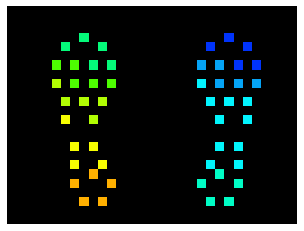

In [49]:
# img = cv2.GaussianBlur(img, (9, 9), 0) * 3
# img[img[:, :] == [0, 0, 0]] = [255, 255, 255]


# img = cv2.blur(img, (5, 5), 0) * 3
plt.imshow(img)
plt.axis("off")

In [50]:
np.sum(img > 200)

65

(-0.5, 959.5, 719.5, -0.5)

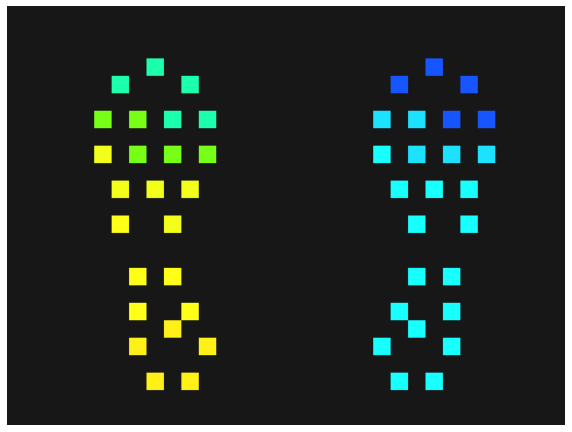

In [51]:
img = cv2.resize(img, None, fx=30, fy=30, interpolation=cv2.INTER_NEAREST)
# img = cv2.blur(img, (71, 71))
img = apply_brightness_contrast(img, 64, 32)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")

In [52]:
from scipy import interpolate
x = np.arange(-5.01, 5.01, 0.25)
y = np.arange(-5.01, 5.01, 0.25)
xx, yy = np.meshgrid(x, y)
z = np.sin(xx**2+yy**2)
f = interpolate.interp2d(x, y, z, kind='cubic')


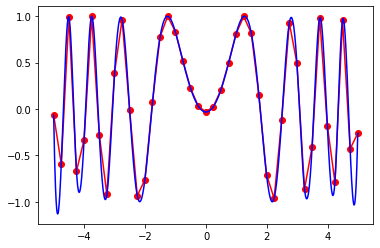

In [53]:
import matplotlib.pyplot as plt
xnew = np.arange(-5.01, 5.01, 1e-2)
ynew = np.arange(-5.01, 5.01, 1e-2)
znew = f(xnew, ynew)
plt.plot(x, z[0, :], 'ro-', xnew, znew[0, :], 'b-')
plt.show()

In [54]:
xx.shape

(41, 41)

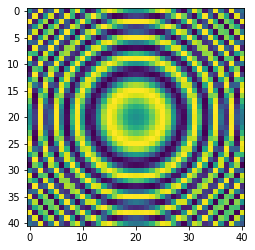

In [55]:
plt.imshow(z)

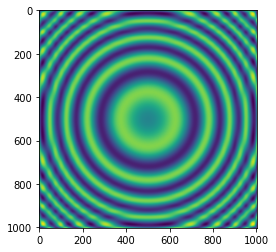

In [56]:
plt.imshow(znew)

In [57]:
x = np.zeros((3, 3), dtype=np.uint8)

y = np.array(x, dtype=np.uint8)

In [58]:
y

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]], dtype=uint8)

In [59]:
from thermogram import Thermogram

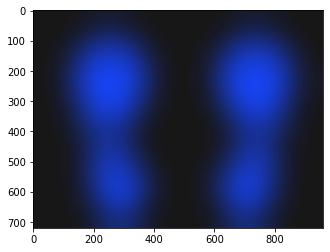

In [60]:
temperature = [27.0] * 50

thermogram = Thermogram.generate_thermogram(temperature)

plt.imshow(thermogram)